# Stock Prediction

In [1]:
import pandas as pd
apple = pd.read_csv("AAPL.csv")
apple.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-29,100.589996,100.690002,98.040001,99.620003,93.514290,142718700
1,2014-10-06,99.949997,102.379997,98.309998,100.730003,94.556244,280258200
2,2014-10-13,101.330002,101.779999,95.180000,97.669998,91.683792,358539800
3,2014-10-20,98.320000,105.489998,98.220001,105.220001,98.771042,358532900
4,2014-10-27,104.849998,108.040001,104.699997,108.000000,101.380676,220230600


In [2]:
"training days =",apple.shape

('training days =', (184, 7))

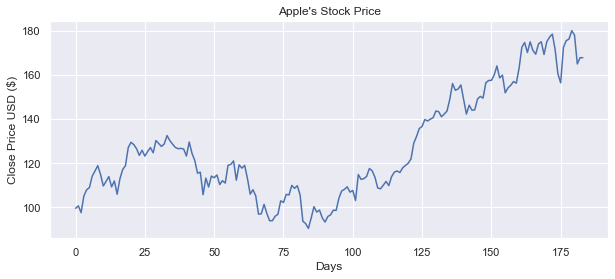

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.figure(figsize=(10, 4))
plt.title("Apple's Stock Price")
plt.xlabel("Days")
plt.ylabel("Close Price USD ($)")
plt.plot(apple["Close"])
plt.show()

In [4]:
apple = apple[["Close"]]
apple.head()

,Close
0,99.620003
1,100.730003
2,97.669998
3,105.220001
4,108.000000


In [5]:
futureDays = 25

In [6]:
apple["Prediction"] = apple[["Close"]].shift(-futureDays)
apple.head()


,Close,Prediction
0,99.620003,123.250000
1,100.730003,125.320000
2,97.669998,127.099998
3,105.220001,124.750000
4,108.000000,130.279999


In [7]:
apple.tail()

,Close,Prediction
179,179.979996,NaN
180,178.020004,NaN
181,164.940002,NaN
182,167.779999,NaN
183,167.779999,NaN


In [8]:
apple["Prediction"] = apple[["Close"]].shift(-futureDays)
apple.head()


,Close,Prediction
0,99.620003,123.250000
1,100.730003,125.320000
2,97.669998,127.099998
3,105.220001,124.750000
4,108.000000,130.279999


In [9]:
apple.tail()

,Close,Prediction
179,179.979996,NaN
180,178.020004,NaN
181,164.940002,NaN
182,167.779999,NaN
183,167.779999,NaN


In [10]:
import numpy as np

xfuture = apple.drop(["Prediction"], 1)[:-futureDays]
xfuture = xfuture.tail(futureDays)
xfuture = np.array(xfuture)
xfuture

C:\Users\pc\AppData\Local\Temp\ipykernel_11144\1452221677.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  xfuture = apple.drop(["Prediction"], 1)[:-futureDays]


array([[143.649994],
       [148.960007],
       [156.100006],
       [153.059998],
       [153.610001],
       [155.449997],
       [148.979996],
       [142.270004],
       [146.279999],
       [144.020004],
       [144.179993],
       [149.039993],
       [150.270004],
       [149.5     ],
       [156.389999],
       [157.479996],
       [157.5     ],
       [159.860001],
       [164.050003],
       [158.630005],
       [159.880005],
       [151.889999],
       [154.119995],
       [155.300003],
       [156.990005]])

In [11]:
x = np.array(apple.drop(["Prediction"], 1))[:-futureDays]
# print(x)

C:\Users\pc\AppData\Local\Temp\ipykernel_11144\956835330.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = np.array(apple.drop(["Prediction"], 1))[:-futureDays]


In [12]:
y = np.array(apple["Prediction"])[:-futureDays]
y

array([123.25    , 125.32    , 127.099998, 124.75    , 130.279999,
       128.949997, 127.620003, 128.770004, 132.539993, 130.279999,
       128.649994, 127.169998, 126.599998, 126.75    , 126.440002,
       123.279999, 129.619995, 124.5     , 121.300003, 115.519997,
       115.959999, 105.760002, 113.290001, 109.269997, 114.209999,
       113.449997, 114.709999, 110.379997, 112.120003, 111.040001,
       119.080002, 119.5     , 121.059998, 112.339996, 119.300003,
       117.809998, 119.029999, 113.18    , 106.029999, 108.029999,
       105.260002,  96.959999,  97.129997, 101.419998,  97.339996,
        94.019997,  93.989998,  96.040001,  96.910004, 103.010002,
       102.260002, 105.919998, 105.669998, 109.989998, 108.660004,
       109.849998, 105.68    ,  93.739998,  92.720001,  90.519997,
        95.220001, 100.349998,  97.919998,  98.830002,  95.330002,
        93.400002,  95.889999,  96.68    ,  98.779999,  98.660004,
       104.209999, 107.480003, 108.18    , 109.360001, 106.940

In [13]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25)

In [14]:
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor
 
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
 
# fit the regressor with x and y data
regressor.fit(xtest, ytest) 

RandomForestRegressor(random_state=0)

# To see the model tree prediction¶


In [15]:
Y_pred = regressor.predict(xfuture)  # test the output by changing values

print("Decision Tree prediction =",Y_pred)

Decision Tree prediction = [157.59909855 168.17570194 172.6574009  172.50260078 172.50260078
 172.6574009  168.17570194 164.49449677 158.88319996 157.78489857
 157.78489857 168.17570194 170.91350226 168.17570194 170.1409002
 170.35170122 170.35170122 173.8080045  173.8080045  173.8080045
 173.8080045  171.54290246 172.6574009  172.6574009  170.1409002 ]


# Visualize Decision tree Predictions¶


C:\Users\pc\AppData\Local\Temp\ipykernel_11144\1684120793.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["Predictions"] = predictions


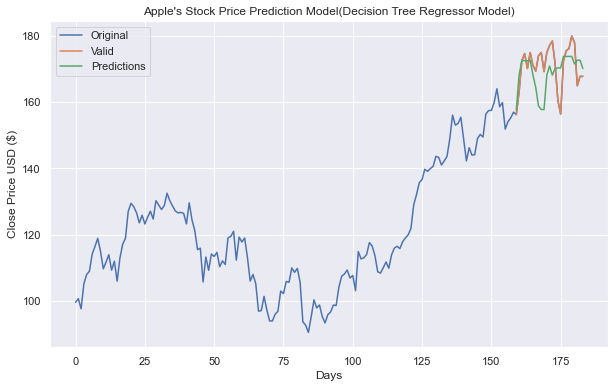

In [17]:
predictions = Y_pred
valid = apple[x.shape[0]:]
valid["Predictions"] = predictions
plt.figure(figsize=(10, 6))
plt.title("Apple's Stock Price Prediction Model(Decision Tree Regressor Model)")
plt.xlabel("Days")
plt.ylabel("Close Price USD ($)")
plt.plot(apple["Close"])
plt.plot(valid[["Close", "Predictions"]])
plt.legend(["Original", "Valid", "Predictions"])
plt.show()

In [ ]:
# !pip install -r requirements.txt